In [ ]:
# Decoding Airbnb Pricing in Boston: How hosts, properties, and locations shape costs.

In [ ]:
# Introduction

In [62]:
# Nowadays, with the increasing of people's life quality, travel becomes more affordable for a lot of people. Meanwhile,
# Airbnb plays a very important role in it. As we know, Boston is known for its vibrant tourism and high cost of living.
# Hence, understanding housing prices on Airbnb is crucial for both landlords and travellers. In this research, I am going
# to study how host attributes, property characteristics, and location contribute to the pricing structure of Airbnb rentals
# in Boston.
# In this research, I am going to use the Airbnb's Boston housing data to analyze different housing types, the experience level
# of host and amentities. Also, I am going to import a large dataset including poverty rates, occupation and etc to find the pricing 
# trend.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
listings = pd.read_csv('listings.csv')

In [6]:
reviews = pd.read_csv('reviews.csv')

In [41]:
calendar = pd.read_csv('calendar.csv')

In [56]:
file_path = "2015-2019_neighborhood_tables_2021.12.21.xlsm"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)
df = pd.read_excel(xls, sheet_name='Race')
print(df.head())

['Age', 'Household Type', 'Race', 'Group Quarters Population', 'Nativity', 'Geographic Mobility', 'Educational Attainment', 'School Enrollment', 'Means of Commuting', 'Travel Time to Work', 'Place of Work', 'Per Capita Income', 'Occupation', 'Industries', 'Labor Force', 'Household Income', 'Family Income', 'Housing Tenure', 'Bedrooms', 'Vacancy Rates', 'Vehicles per Household', 'Poverty Rates', 'Poverty Rates by Age']
  Race & Ethnicity        Unnamed: 1   Unnamed: 2 Unnamed: 3  \
0              NaN               NaN        45858        NaN   
1              NaN  Total Population  White Alone          %   
2   United States          324697795    197100373   0.607027   
3    Massachusetts           6850553      4903539   0.715787   
4           Boston            684379       304524   0.444964   

               Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7   Unnamed: 8  \
0                    3478        NaN       9275        NaN        12971   
1  Black/African-American          %   Hisp

In [58]:
# Data Cleaning

In [60]:
def clean_calendar_data(df):
    df['price'] = df['price'].replace(r'[\\$,]', '', regex=True).astype(float)
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['price', 'date'], inplace=True)
    return df

In [9]:
calendar_cleaned = clean_calendar_data(calendar)

In [10]:
calendar_cleaned

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0
...,...,...,...,...
1308875,14504422,2016-09-20,t,62.0
1308876,14504422,2016-09-19,t,62.0
1308877,14504422,2016-09-18,t,62.0
1308878,14504422,2016-09-17,t,62.0


In [11]:
def clean_listings_data(df):
    numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = df[col].replace(r'[\\$,]', '', regex=True).astype(float, errors='ignore')
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    df.dropna(subset=['price', 'minimum_nights'], inplace=True)
    df['amenities_count'] = df['amenities'].str.split(',').apply(len)  # Add amenities count column
    return df

In [12]:
listings_cleaned = clean_listings_data(listings)

In [13]:
listings_cleaned

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,amenities_count
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,NaN,NaN,f,moderate,f,f,1,NaN,15
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,NaN,NaN,t,moderate,f,f,1,1.30,21
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,NaN,f,moderate,t,f,1,0.47,18
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,NaN,NaN,f,moderate,f,f,1,1.00,23
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,NaN,NaN,f,flexible,f,f,1,2.25,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,f,NaN,NaN,t,strict,f,f,8,0.34,18
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,f,NaN,NaN,f,strict,f,f,2,NaN,24
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,f,NaN,NaN,f,flexible,f,f,1,NaN,2
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,f,NaN,NaN,f,strict,f,f,1,2.00,8


In [14]:
def clean_reviews_data(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date', 'reviewer_id'], inplace=True)
    return df

In [15]:
reviews_cleaned = clean_reviews_data(reviews)

In [16]:
reviews_cleaned

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [ ]:
# Summary Statistics

In [68]:
selected_columns = [
    "price", "host_listings_count", "host_since", "host_is_superhost",
    "property_type", "bedrooms", "bathrooms", "neighbourhood_cleansed"
]

listings_selected_df = listings[selected_columns].copy()

listings_selected_df["price"] = listings_selected_df["price"].replace(r'[\$,]', '', regex=True).astype(float)

listings_selected_df["host_since"] = pd.to_datetime(listings_selected_df["host_since"])

income_df = pd.read_excel(xls, sheet_name="Per Capita Income")
household_income_df = pd.read_excel(xls, sheet_name="Household Income")
poverty_df = pd.read_excel(xls, sheet_name="Poverty Rates")

income_df = income_df.iloc[3:, [0, 3]]
income_df.columns = ["Region", "Per Capita Income"]

household_income_df = household_income_df.iloc[3:, [0, 1]] 
household_income_df.columns = ["Region", "Median Household Income"]

poverty_df = poverty_df.iloc[3:, [0, 3]] 
poverty_df.columns = ["Region", "Poverty Rate"]

listings_selected_df = listings_selected_df.rename(columns={"neighbourhood_cleansed": "Region"})
merged_df = listings_selected_df.merge(income_df, on="Region", how="left")
merged_df = merged_df.merge(household_income_df, on="Region", how="left")
merged_df = merged_df.merge(poverty_df, on="Region", how="left")

merged_df["Per Capita Income"] = pd.to_numeric(merged_df["Per Capita Income"], errors="coerce")
merged_df["Median Household Income"] = pd.to_numeric(merged_df["Median Household Income"], errors="coerce")
merged_df["Poverty Rate"] = pd.to_numeric(merged_df["Poverty Rate"], errors="coerce")

summary_statistics_extended = merged_df.describe(include="all")

print(summary_statistics_extended)

summary_statistics_extended.to_csv("summary_statistics_extended.csv", index=True)

              price  host_listings_count                     host_since  \
count   3585.000000          3585.000000                           3585   
unique          NaN                  NaN                            NaN   
top             NaN                  NaN                            NaN   
freq            NaN                  NaN                            NaN   
mean     173.925802            58.902371  2014-03-27 07:57:35.397489664   
min       10.000000             0.000000            2008-11-11 00:00:00   
25%       85.000000             1.000000            2013-04-26 00:00:00   
50%      150.000000             2.000000            2014-08-04 00:00:00   
75%      220.000000             7.000000            2015-06-22 00:00:00   
max     4000.000000           749.000000            2016-09-06 00:00:00   
std      148.331321           171.119663                            NaN   

       host_is_superhost property_type     bedrooms    bathrooms  \
count               3585       

In [ ]:
# Interpretation of Summary Statistics:

In [ ]:
# First, "count" represents total number of non-missing values in the column. "Unique" represents number of distinct values in the column.
# "Top" represents the most frequently occurring value in the column. "Freq" represents the number of times the most frequent value appears.
# "Mean" represents average. "Min" is minimum. "Max" is maximum. "STD" is standard deviation. "25%", "75%", "50%" represents different quantiles.
# 
#
#
#
#
#
#
#
#
#


In [ ]:
# Visualizations

In [ ]:
# Histogram

In [17]:
listings['log_price'] = np.log1p(listings['price'])

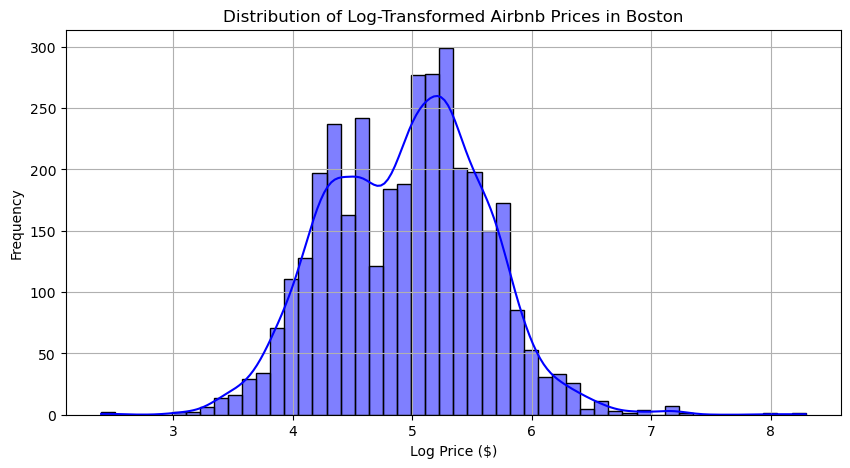

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(listings['log_price'], bins=50, kde=True, color='blue')
plt.xlabel('Log Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Airbnb Prices in Boston')
plt.grid(True)
plt.show()

In [ ]:
# Boxplot

/var/folders/fk/yxzm2ryx4k7bb2s60whwdgwr0000gn/T/ipykernel_27180/3325581047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='property_type', y='log_price', data=listings, palette='Set2')


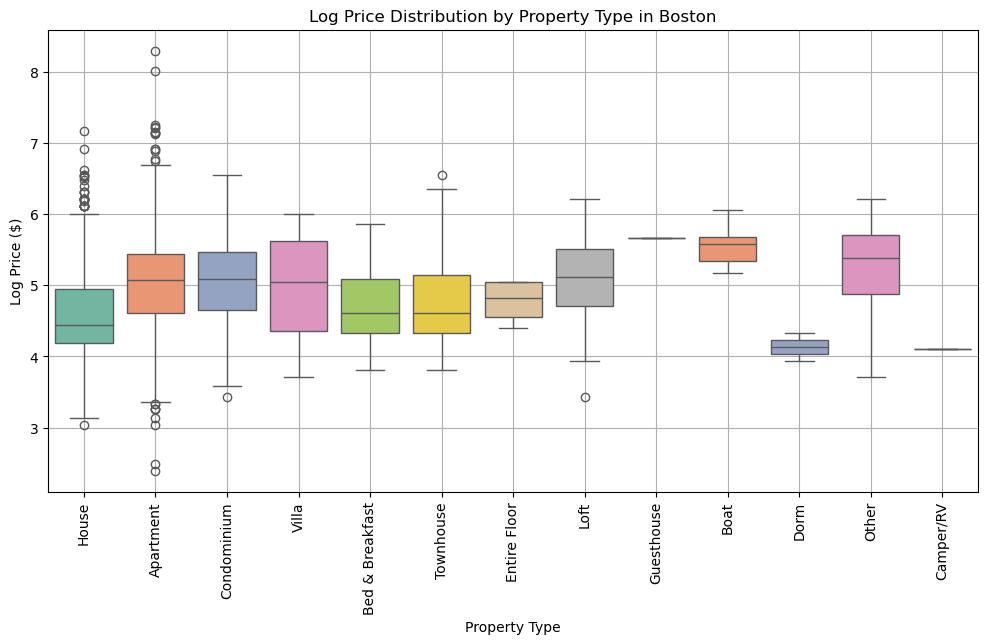

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='log_price', data=listings, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Log Price ($)')
plt.title('Log Price Distribution by Property Type in Boston')
plt.grid(True)
plt.show()

In [ ]:
# Line Plot

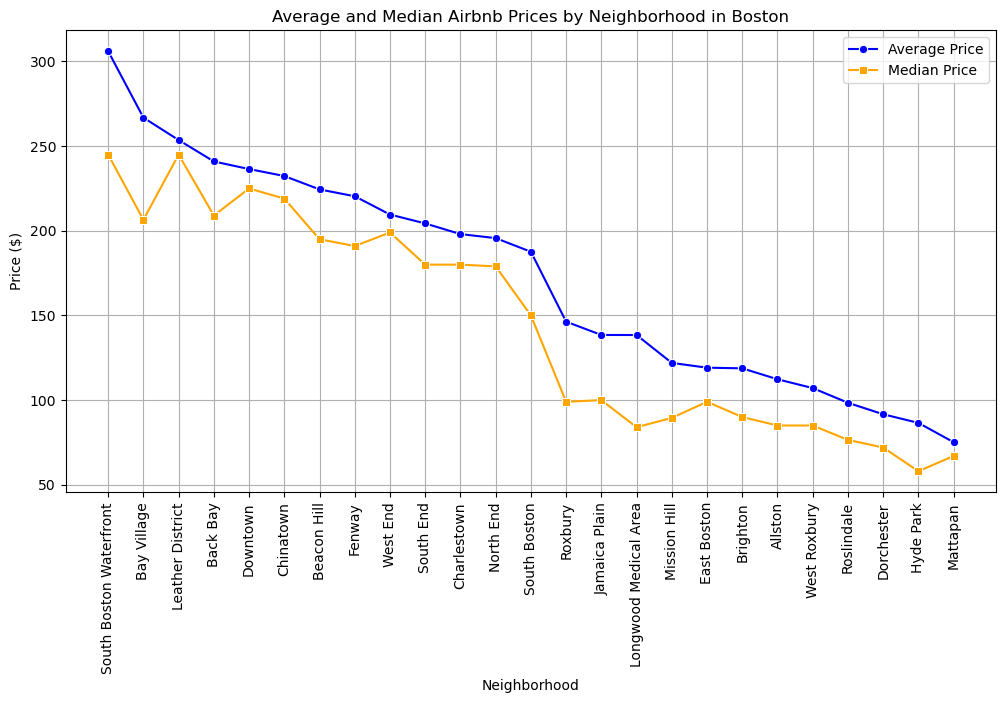

In [46]:
neighborhood_stats = listings.groupby('neighbourhood_cleansed')['price'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=neighborhood_stats.index, y=neighborhood_stats['mean'], marker='o', color='blue', label='Average Price')
sns.lineplot(x=neighborhood_stats.index, y=neighborhood_stats['median'], marker='s', color='orange', label='Median Price')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Price ($)')
plt.title('Average and Median Airbnb Prices by Neighborhood in Boston')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Scatter plot

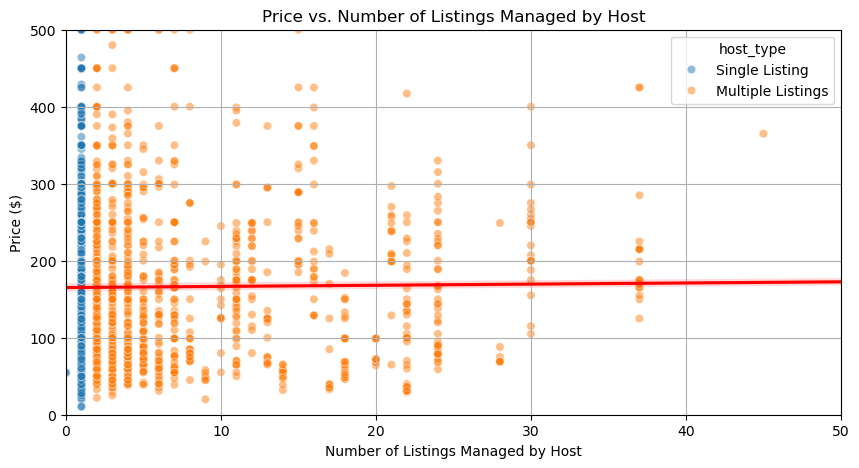

In [39]:
listings['host_listings_count'] = listings['host_listings_count'].fillna(1)  # Fill NaN with 1 for single listing hosts
listings['host_type'] = listings['host_listings_count'].apply(lambda x: 'Multiple Listings' if x > 1 else 'Single Listing')

plt.figure(figsize=(10, 5))
sns.scatterplot(x=listings['host_listings_count'], y=listings['price'], hue=listings['host_type'], alpha=0.5)
sns.regplot(x=listings['host_listings_count'], y=listings['price'], scatter=False, color='red')
plt.xlim(0, 50)  # Limiting for better visualization
plt.ylim(0, 500)
plt.xlabel('Number of Listings Managed by Host')
plt.ylabel('Price ($)')
plt.title('Price vs. Number of Listings Managed by Host')
plt.grid(True)
plt.show()